# Convolutional Neural Networks (CNN) for Image Classification

## By: Mustafa Yildirim

100%|██████████| 170M/170M [00:02<00:00, 69.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
number of images in the training set: 50000
number of images in the test set: 10000
size of first image in the training set = torch.Size([3, 32, 32]), its label = frog


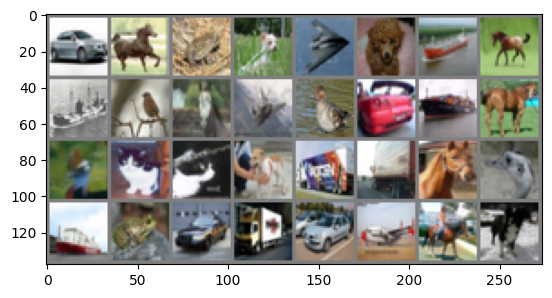

car   horse frog  dog   plane dog   ship  horse ship  bird  horse plane bird  car   ship  horse bird  cat   cat   dog   truck truck horse bird  ship  frog  car   truck car   plane horse dog  


In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# function to preprocess cifar10 images
transform = torchvision.transforms.Compose(
    [torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



batch_size = 32

# Training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


print(f"number of images in the training set: {len(trainset)}")
print(f"number of images in the test set: {len(testset)}")
print(f"size of first image in the training set = {trainset[0][0].shape}, its label = {classes[trainset[0][1]]}")


# display images in the first batch and their labels
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


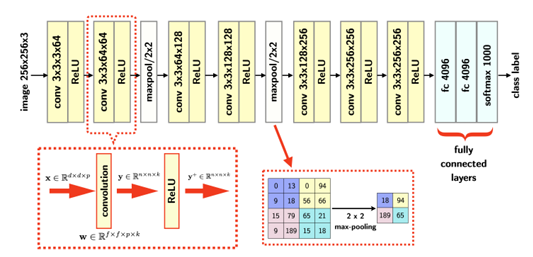

In [ ]:
import torch
from torch import nn
import torchkeras
from sklearn.metrics import accuracy_score

Figure Implementation

In [ ]:
class CnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([
            # Layer #1
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),

            # Layer #2
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),

            # Layer #3
            nn.MaxPool2d(kernel_size=2, stride=2), # 16x16

            # Layer #4
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            # Layer #5
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            # Layer #6
            nn.MaxPool2d(kernel_size=2, stride=2), #8x8

            # Layer #7
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            # Layer #8
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            # Layer #9
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            # Layer #10
            nn.Flatten(),
            nn.Linear(8*8*256, 4096),
            nn.ReLU(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, 10)
            ]
        )


    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

Training the CNN model using the GPU

In [ ]:
model = torchkeras.Model(CnnModel())
model.summary(input_shape=(3,32,32))

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    acc = accuracy_score(y_true.cpu().numpy(), y_pred_cls.cpu().numpy())
    return torch.tensor(acc, device=y_pred.device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # using GPU if available
model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.SGD(model.parameters(), lr=0.1),
             metrics_dict={"accuracy":accuracy},device = device)

dfhistory = model.fit(epochs=10, dl_train=trainloader, dl_val=testloader, log_step_freq=500)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

1st Configuration

In [ ]:
class CnnModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([

            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), # 16x16

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), #8x8

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), #4x4

            nn.Flatten(),
            nn.Linear(4*4*256, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
            ]
        )


    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
model = torchkeras.Model(CnnModel1())
model.summary(input_shape=(3,32,32))

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    acc = accuracy_score(y_true.cpu().numpy(), y_pred_cls.cpu().numpy())
    return torch.tensor(acc, device=y_pred.device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # using GPU if available
model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.SGD(model.parameters(), lr=0.1),
             metrics_dict={"accuracy":accuracy},device = device)

dfhistory = model.fit(epochs=10, dl_train=trainloader, dl_val=testloader, log_step_freq=500)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

2nd Configuration

In [ ]:
class CnnModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([

            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Flatten(),
            nn.Linear(4*4*256, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10)
            ]
        )


    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
model = torchkeras.Model(CnnModel2())
model.summary(input_shape=(3,32,32))

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    acc = accuracy_score(y_true.cpu().numpy(), y_pred_cls.cpu().numpy())
    return torch.tensor(acc, device=y_pred.device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # using GPU if available
model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.SGD(model.parameters(), lr=0.1),
             metrics_dict={"accuracy":accuracy},device = device)

dfhistory = model.fit(epochs=10, dl_train=trainloader, dl_val=testloader, log_step_freq=500)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
        MaxPool2d-13            [-1, 256, 4, 4]               0
          Flatten-14                 [-

3rd Configuration

In [ ]:
class CnnModel3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([

            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), # 16x16

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), # 8x8

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), #4x4

            nn.Flatten(),
            nn.Linear(4*4*32, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
            ]
        )


    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
model = torchkeras.Model(CnnModel3())
model.summary(input_shape=(3,32,32))

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    acc = accuracy_score(y_true.cpu().numpy(), y_pred_cls.cpu().numpy())
    return torch.tensor(acc, device=y_pred.device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # using GPU if available
model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.SGD(model.parameters(), lr=0.1),
             metrics_dict={"accuracy":accuracy},device = device)

dfhistory = model.fit(epochs=10, dl_train=trainloader, dl_val=testloader, log_step_freq=500)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 32, 16, 16]           9,248
              ReLU-5           [-1, 32, 16, 16]               0
         MaxPool2d-6             [-1, 32, 8, 8]               0
            Conv2d-7             [-1, 32, 8, 8]           9,248
              ReLU-8             [-1, 32, 8, 8]               0
         MaxPool2d-9             [-1, 32, 4, 4]               0
          Flatten-10                  [-1, 512]               0
           Linear-11                  [-1, 512]         262,656
             ReLU-12                  [-1, 512]               0
           Linear-13                  [-1, 256]         131,328
             ReLU-14                  [

4th Configuration

In [ ]:
class CnnModel4(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([

            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), # 16x16

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), #8x8

            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), #4x4

            nn.Flatten(),
            nn.Linear(4*4*128, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10)
            ]
        )


    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
model = torchkeras.Model(CnnModel4())
model.summary(input_shape=(3,32,32))

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    acc = accuracy_score(y_true.cpu().numpy(), y_pred_cls.cpu().numpy())
    return torch.tensor(acc, device=y_pred.device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # using GPU if available
model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.SGD(model.parameters(), lr=0.1),
             metrics_dict={"accuracy":accuracy},device = device)

dfhistory = model.fit(epochs=10, dl_train=trainloader, dl_val=testloader, log_step_freq=500)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3          [-1, 128, 32, 32]          73,856
              ReLU-4          [-1, 128, 32, 32]               0
         MaxPool2d-5          [-1, 128, 16, 16]               0
            Conv2d-6          [-1, 256, 16, 16]         295,168
              ReLU-7          [-1, 256, 16, 16]               0
            Conv2d-8          [-1, 256, 16, 16]         590,080
              ReLU-9          [-1, 256, 16, 16]               0
        MaxPool2d-10            [-1, 256, 8, 8]               0
           Conv2d-11            [-1, 128, 8, 8]         295,040
             ReLU-12            [-1, 128, 8, 8]               0
           Conv2d-13            [-1, 128, 8, 8]         147,584
             ReLU-14            [-1, 12

5th Configuration

In [ ]:
class CnnModel5(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([

            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Flatten(),
            nn.Linear(16*16*16, 10)
            ]
        )


    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
model = torchkeras.Model(CnnModel5())
model.summary(input_shape=(3,32,32))

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    acc = accuracy_score(y_true.cpu().numpy(), y_pred_cls.cpu().numpy())
    return torch.tensor(acc, device=y_pred.device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # using GPU if available
model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.SGD(model.parameters(), lr=0.1),
             metrics_dict={"accuracy":accuracy},device = device)

dfhistory = model.fit(epochs=10, dl_train=trainloader, dl_val=testloader, log_step_freq=500)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
              ReLU-2           [-1, 16, 32, 32]               0
         MaxPool2d-3           [-1, 16, 16, 16]               0
           Flatten-4                 [-1, 4096]               0
            Linear-5                   [-1, 10]          40,970
Total params: 41,418
Trainable params: 41,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.011719
Forward/backward pass size (MB): 0.312576
Params size (MB): 0.157997
Estimated Total Size (MB): 0.482292
----------------------------------------------------------------
Start Training ...

================================================================================2024-12-07 12:10:17
{'step': 500, 'loss': 1.673, 'accuracy': 0.408}
{'step': 1000, 'loss': 1.547, 'accuracy': 0.458}
{'s

6th Configuration

In [ ]:
class CnnModel6(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), # 16x16

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), #8x8

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), #4x4

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(4*4*512, 8192),
            nn.ReLU(),
            nn.Linear(8192, 8192),
            nn.ReLU(),
            nn.Linear(8192, 10)
            ]
        )


    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
model = torchkeras.Model(CnnModel6())
model.summary(input_shape=(3,32,32))

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    acc = accuracy_score(y_true.cpu().numpy(), y_pred_cls.cpu().numpy())
    return torch.tensor(acc, device=y_pred.device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # using GPU if available
model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.SGD(model.parameters(), lr=0.1),
             metrics_dict={"accuracy":accuracy},device = device)

dfhistory = model.fit(epochs=10, dl_train=trainloader, dl_val=testloader, log_step_freq=500)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

Report your best results and discuss your findings from experiments.

Findings:

The baseline model performed decently, achieving a validation accuracy of 78.1%. However, it showed signs of overfitting due to its large number of parameters (86.67 million).

The best performaning model was the 4th configuration, with a validation accuracy of 82.3%. This configuration used 7.85 million parameters, balancing complexity and efficiency. These changes allowed the model to learn detailed features without overfitting too much.

Simpler models like the 3rd and 5th configurations, which used fewer parameters (415,946 and 41,418), underperformed because they lacked the complexity to capture enough patterns.

On the other hand, the 6th configuration with 141.95 million parameters completely failed to generalize, achieving only 10% validation accuracy. This shows that excessive parameters can overwhelm the model, leading to poor optimization and overfitting.


These results show that the number of parameters must be carefully optimized to balance learning and generalization.
